In [1]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import applications
import matplotlib.pyplot as plt

# 3.3 컬러 이미지를 분류하는 DNN 구현

### 그래프 출력

In [2]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

### 분류 DNN 모델 구현

In [3]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


### 데이터 준비

In [4]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

### 분류 DNN 학습 및 테스팅

170500096/170498071 [==============================] - 20s 0us/step
Epoch 1/100
400/400 [==============================] - 3s 9ms/step - loss: 2.1271 - accuracy: 0.1984 - val_loss: 1.9172 - val_accuracy: 0.3012
Epoch 2/100
400/400 [==============================] - 3s 7ms/step - loss: 1.9723 - accuracy: 0.2785 - val_loss: 1.8650 - val_accuracy: 0.3242
Epoch 3/100
400/400 [==============================] - 3s 7ms/step - loss: 1.8795 - accuracy: 0.3208 - val_loss: 1.8195 - val_accuracy: 0.3472
Epoch 4/100
400/400 [==============================] - 3s 7ms/step - loss: 1.8330 - accuracy: 0.3442 - val_loss: 1.7392 - val_accuracy: 0.3818
Epoch 5/100
400/400 [==============================] - 3s 7ms/step - loss: 1.7988 - accuracy: 0.3564 - val_loss: 1.7474 - val_accuracy: 0.3647
Epoch 6/100
400/400 [==============================] - 3s 7ms/step - loss: 1.7745 - accuracy: 0.3672 - val_loss: 1.7255 - val_accuracy: 0.3760
Epoch 7/100
400/400 [==============================] - 3s 7ms/step - loss:

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

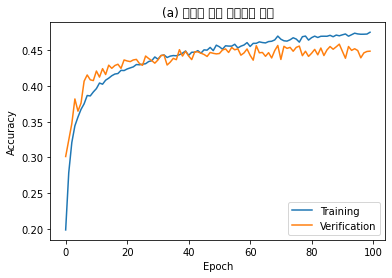

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)


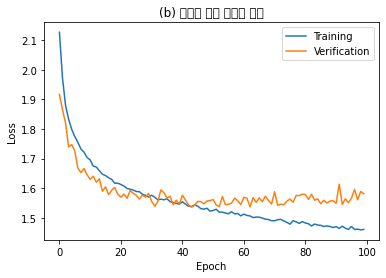

In [5]:
def main():
    Nh_l = [100, 50]
    number_of_class = 10
    Pd_l=[0.005, 0.5]
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

    print('\n###Evaluate Model###')
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history, '(a) 학습을 통한 정확도의 변화')
    plt.show()
    plot_loss(history, '(b) 학습을 통한 손실의 변화')
    plt.show()
  
if __name__ == '__main__':
    main()